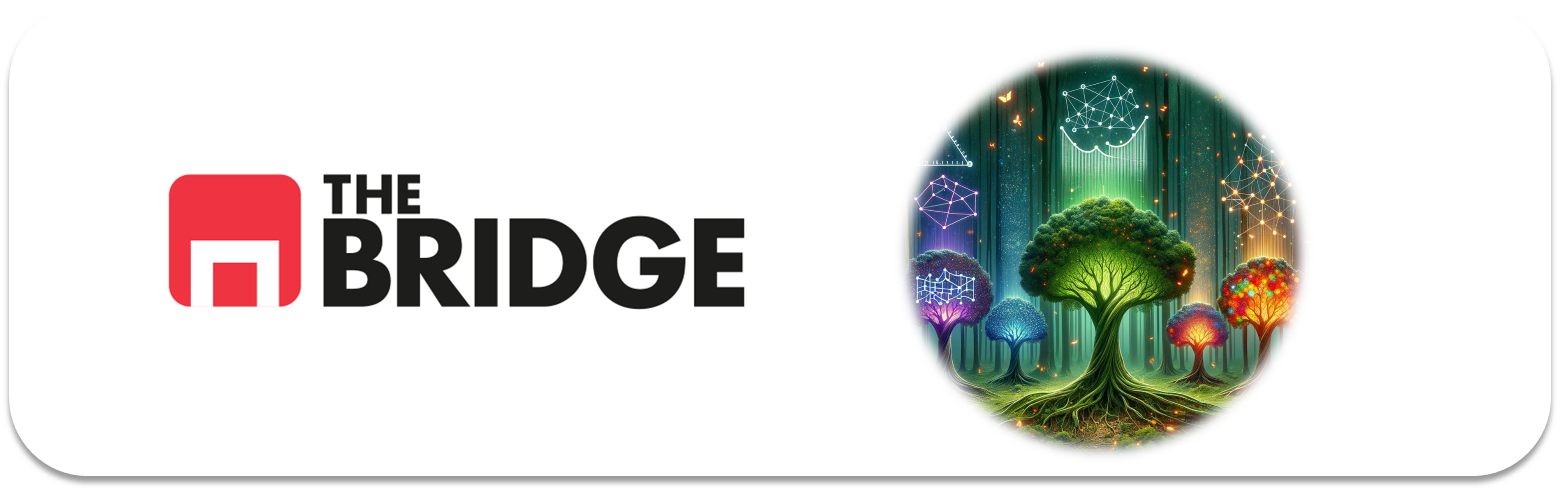

## PRACTICA OBLIGATORIA: **Arboles de Decisión y Ajuste de hiperparámetros**

* La práctica obligatoria de esta unidad consiste en encontrar el mejor modelo para resolver un problema de predicción de si los destinatarios de una campaña de marketing adquirirán un producto concreto. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report 
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor



### Descripción

En el directorio data encontrarás un dataset que contiene datos relacionados con campañas de marketing directo de una institución bancaria portuguesa (es el dataset "Bank Marketing" de la UCI Machine Learning Repository). Los datos se recopilaron de campañas de marketing telefónico, donde el objetivo principal era predecir si el cliente se suscribiría a un depósito a plazo.

La práctica consiste en completar el proceso de creación de un modelo basado en árboles de decisión que permita predecir si un cliente (dadas unas características similares a las del dataset) "comprará" el depósito a plazo. Sigue los pasos necesarios de un proceso de ML para crear el modelo, optimizar sus hiperparámetros, comparar los resultados de esa optimización con una regresión logística (sin optimizar, con sus hiperparámetros por defecto) y finalmente evaluarlo contra test y hacer una pequeña valoración del resultado obtenido.

Tendrás que hacer la limpieza, split, minieda, selección, tratamiento, primeros entrenamientos, optimización, comparación y evaluación según tu mejor criterio. Eso sí, es obligatorio:
- Identificar el target y analizar su distribución
- Realizar una optimización de hiperparámetros, escogiendo un grid medianemante razonado
- Comparar con el modelo baseline
- Evaluar contra test

AYUDA: La dirección del banco nos proporciona estas notas (en inglés):

 
   **bank client data:**  
   1 - age (numeric)  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
   4 - education (categorical: "unknown","secondary","primary","tertiary")  
   5 - default: has credit in default? (binary: "yes","no")  
   6 - balance: average yearly balance, in euros (numeric)   
   7 - housing: has housing loan? (binary: "yes","no")  
   8 - loan: has personal loan? (binary: "yes","no")   

   **related with the last contact of the current campaign:**  
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")   
  10 - day: last contact day of the month (numeric)  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  12 - duration: last contact duration, in seconds (numeric)    

   **other attributes:**  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  

### 1. VISUALIZACIÓN DEL DATAFRAME

In [2]:
BancaMarketing = pd.read_csv("./data/bank-full.csv", sep =";")
BancaMarketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


> No hay nulos.

In [3]:
BancaMarketing.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
cardinalidades = BancaMarketing.nunique()
print("Cardinalidades de todas las columnas:")
print()
print(cardinalidades);

Cardinalidades de todas las columnas:

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64


### 2. ELECCIÓN Y ANÁLISIS DEL TARGET

No hay ninguna columna de la que tengamos información que parezca apropiada para ser el target.  
De "y" no tenemos información, siendo la única de la que no tenemos información.  
Basándonos en que normalmente se usa "y" para referirse al target, esta será nuestra columna target (el objetivo, para entendernos).  
¿Qué sería de la vida sin un poco de riesgo?

In [5]:
valores_y = BancaMarketing['y'].unique()
print("Las entras en la columna 'y' son :")
print(valores_y)

Las entras en la columna 'y' son :
['no' 'yes']


Tanto al visualizar las primeras filas del dataframe como al imprimir (con ".info()") y al ver su cardinalidad,  
quedaba claro que aunque fuera del tipo "object", en realidad se trata de una booleana.  
Ahora estamos más seguros aún.

VEAMOS SU DISTRIBUCIÓN:

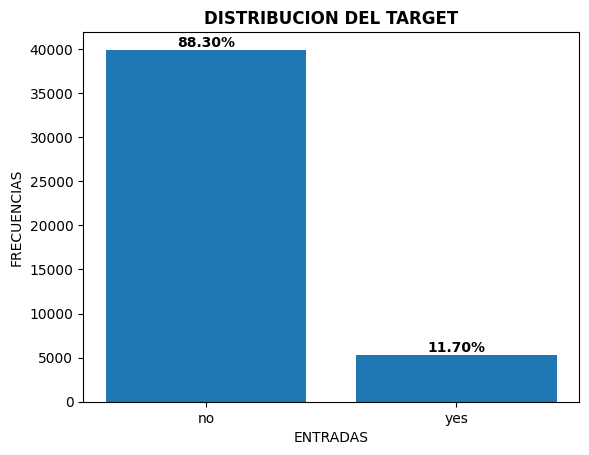

In [6]:

frecuencia_y = BancaMarketing['y'].value_counts()

frecuencia_relativa_y = BancaMarketing['y'].value_counts(normalize=True)

plt.bar(frecuencia_y.index, frecuencia_y.values)

for i, (categoria, freq) in enumerate(frecuencia_y.items()):
    plt.text(i, freq, f'{frecuencia_relativa_y[categoria]:.2%}', ha='center', va='bottom', fontweight='bold')

plt.xlabel('ENTRADAS')
plt.ylabel('FRECUENCIAS')
plt.title('DISTRIBUCION DEL TARGET', fontweight='bold')

plt.show()



> La diferencia entre la frecuencia de 'no', que aparece más del 80%, y de 'yes',  
> que aparece menos del 20% de las veces, es muy grande.  
> Esto puede afectar negativamente en el funcionamiento del modelo.

### 3. MINI EDA

#### 3.1 CONVERSION DE BOOLEANAS A TIPO NUMERICO.

In [7]:
# Reemplazamos los valores en las columnas y convertimos el tipo de datos a numericos.
BancaMarketing["y"] = BancaMarketing["y"].replace({'no': 0, 'yes': 1}).astype(int)
BancaMarketing["default"] = BancaMarketing["default"].replace({'no': 0, 'yes': 1}).astype(int)
BancaMarketing["housing"] = BancaMarketing["housing"].replace({'no': 0, 'yes': 1}).astype(int)
BancaMarketing["loan"] = BancaMarketing["loan"].replace({'no': 0, 'yes': 1}).astype(int)





C:\Users\pepea\AppData\Local\Temp\ipykernel_11516\735041208.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  BancaMarketing["y"] = BancaMarketing["y"].replace({'no': 0, 'yes': 1}).astype(int)
C:\Users\pepea\AppData\Local\Temp\ipykernel_11516\735041208.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  BancaMarketing["default"] = BancaMarketing["default"].replace({'no': 0, 'yes': 1}).astype(int)
C:\Users\pepea\AppData\Local\Temp\ipykernel_11516\735041208.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and w

#### 3.2 CONVERSION DE CATEGORICAS A TIPO NUMERICO.

In [8]:
BancaMarketing["job"] = BancaMarketing["job"].replace({"admin.": 1,"unknown": 2,"unemployed":3,"management":4,"housemaid":5,"entrepreneur":6,"student":7,
                                       "blue-collar":8,"self-employed":9,"retired":10,"technician":11,"services":12}) 
BancaMarketing["marital"] = BancaMarketing["marital"].replace({"married":1,"divorced":2,"single":3}).astype(int)
BancaMarketing["education"] = BancaMarketing["education"].replace({"unknown":4,"secondary": 2,"primary": 1,"tertiary":3}) 
BancaMarketing["contact"] = BancaMarketing["contact"].replace({"unknown":1,"telephone":2,"cellular":3}).astype(int)
BancaMarketing["month"] = BancaMarketing["month"].replace({'may': 5, 'jun': 6,'jul': 7,'aug': 8,'oct': 10,'nov': 11,'dec': 12,'jan': 1, 'feb': 2,'mar': 3,'apr': 4,'sep': 9}).astype(int)
BancaMarketing["poutcome"] = BancaMarketing["poutcome"].replace({"unknown":1,"other":2,"failure":3,"success":4}).astype(int)



C:\Users\pepea\AppData\Local\Temp\ipykernel_11516\3156854083.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  BancaMarketing["job"] = BancaMarketing["job"].replace({"admin.": 1,"unknown": 2,"unemployed":3,"management":4,"housemaid":5,"entrepreneur":6,"student":7,
C:\Users\pepea\AppData\Local\Temp\ipykernel_11516\3156854083.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  BancaMarketing["marital"] = BancaMarketing["marital"].replace({"married":1,"divorced":2,"single":3}).astype(int)
C:\Users\pepea\AppData\Local\Temp\ipykernel

#### 3.3 VISUALIZACION DEL RESULTADO.

In [9]:
BancaMarketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int32
 3   education  45211 non-null  int64
 4   default    45211 non-null  int32
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int32
 7   loan       45211 non-null  int32
 8   contact    45211 non-null  int32
 9   day        45211 non-null  int64
 10  month      45211 non-null  int32
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int32
 16  y          45211 non-null  int32
dtypes: int32(8), int64(9)
memory usage: 4.5 MB


In [10]:
BancaMarketing.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,11,1,3,0,825,0,0,3,17,11,977,3,-1,0,1,1
45207,71,10,2,1,0,1729,0,0,3,17,11,456,2,-1,0,1,1
45208,72,10,1,2,0,5715,0,0,3,17,11,1127,5,184,3,4,1
45209,57,8,1,2,0,668,0,0,2,17,11,508,4,-1,0,1,0
45210,37,6,1,2,0,2971,0,0,3,17,11,361,2,188,11,2,0


#### 3.4 CORRELACIONES Y MAPA DE CALOR.

In [11]:

np.abs(BancaMarketing.corr()['y']).sort_values(ascending=False)

y            1.000000
duration     0.394521
poutcome     0.221128
contact      0.148395
housing      0.139173
pdays        0.103621
previous     0.093236
campaign     0.073172
loan         0.068185
education    0.066241
marital      0.065668
balance      0.052838
day          0.028348
age          0.025155
job          0.024649
default      0.022419
month        0.018717
Name: y, dtype: float64

En este análisis, vemos que la duración de la última llamada ("duration") tiene la correlación más alta con la columna objetivo,  
seguida por la variable "poutcome" y "contact". Esto sugiere que estas características podrían ser particularmente importantes  
para nuestro modelo de machine learning y podrían merecer una mayor atención durante el proceso de construcción del modelo.

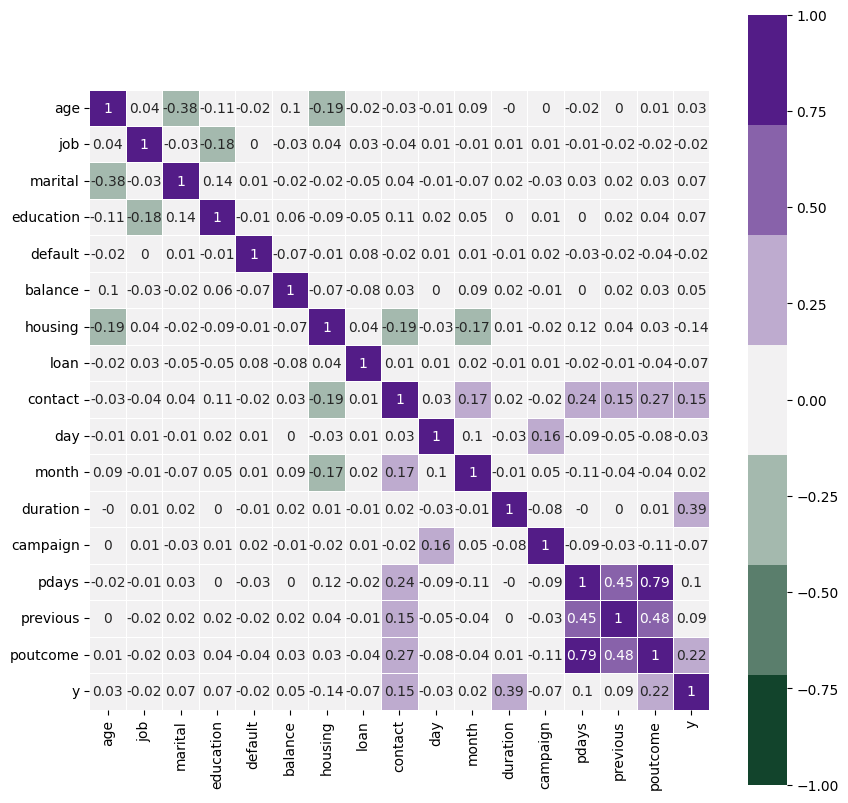

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(np.round(BancaMarketing.corr(), 2),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.5);

In [13]:
BancaMarketing.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,3,0,2143,1,0,1,5,5,261,1,-1,0,1,0
1,44,11,3,2,0,29,1,0,1,5,5,151,1,-1,0,1,0


In [14]:
uno = BancaMarketing[["age","job","marital","education","default", "y"]]
dos = BancaMarketing[["balance","housing","loan","contact", "day", "month", "y"]]
tres = BancaMarketing[["duration", "campaign", "pdays",	"previous",	"poutcome",	"y"]]

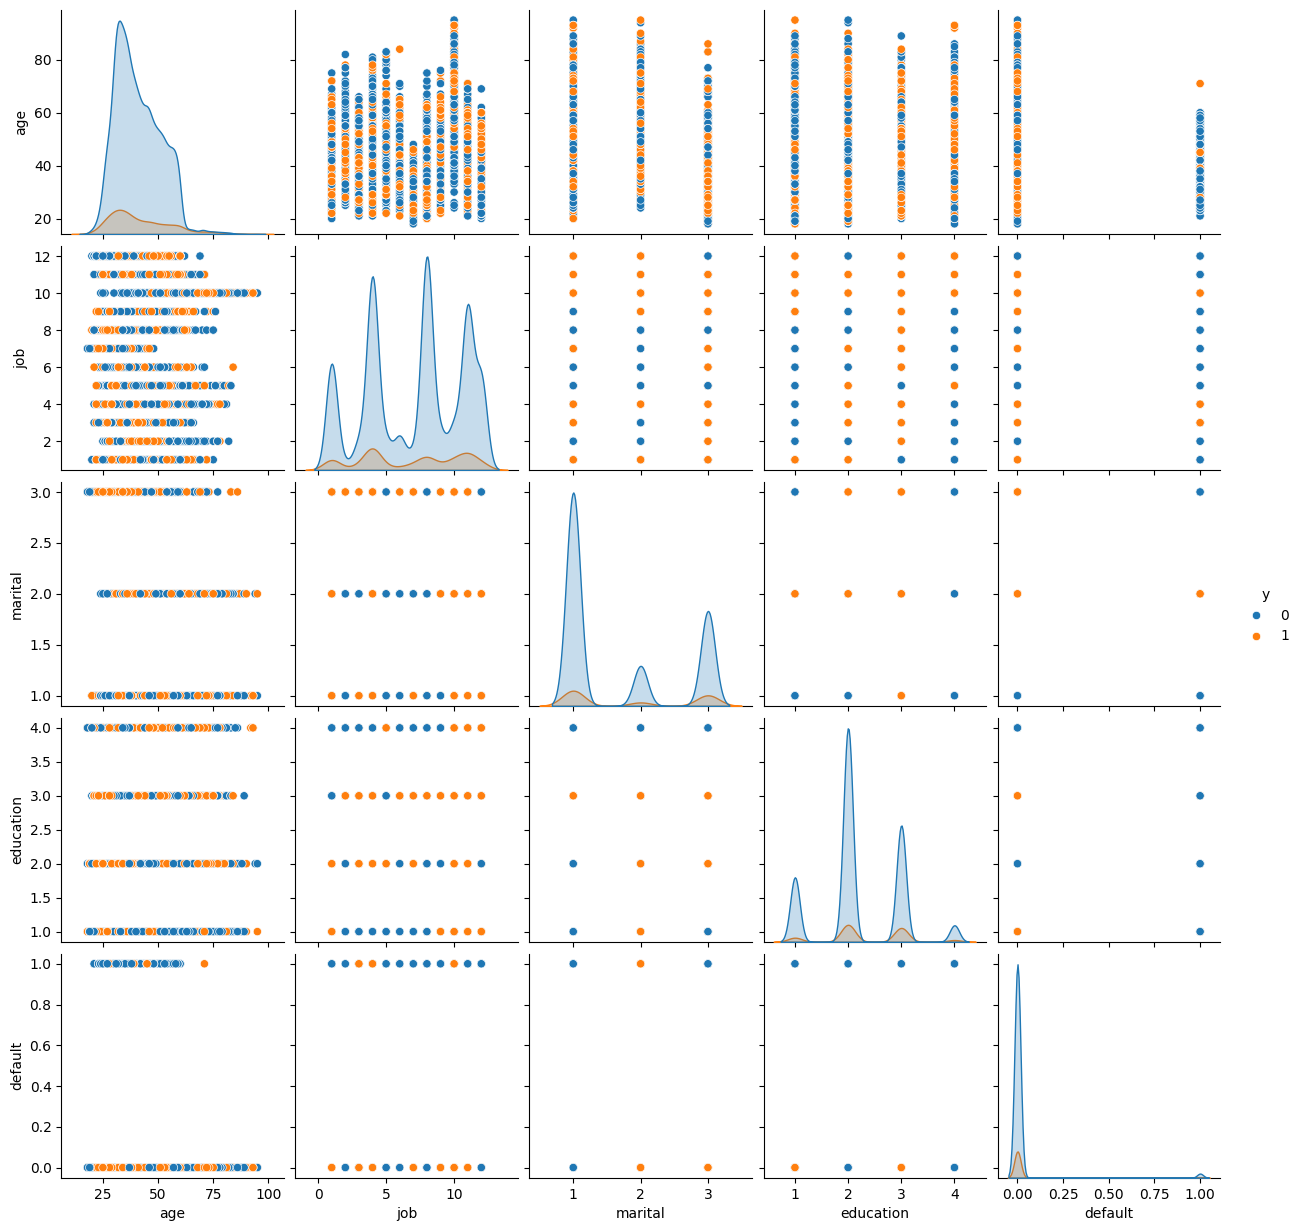

In [15]:
sns.pairplot(uno, hue="y")
plt.show()

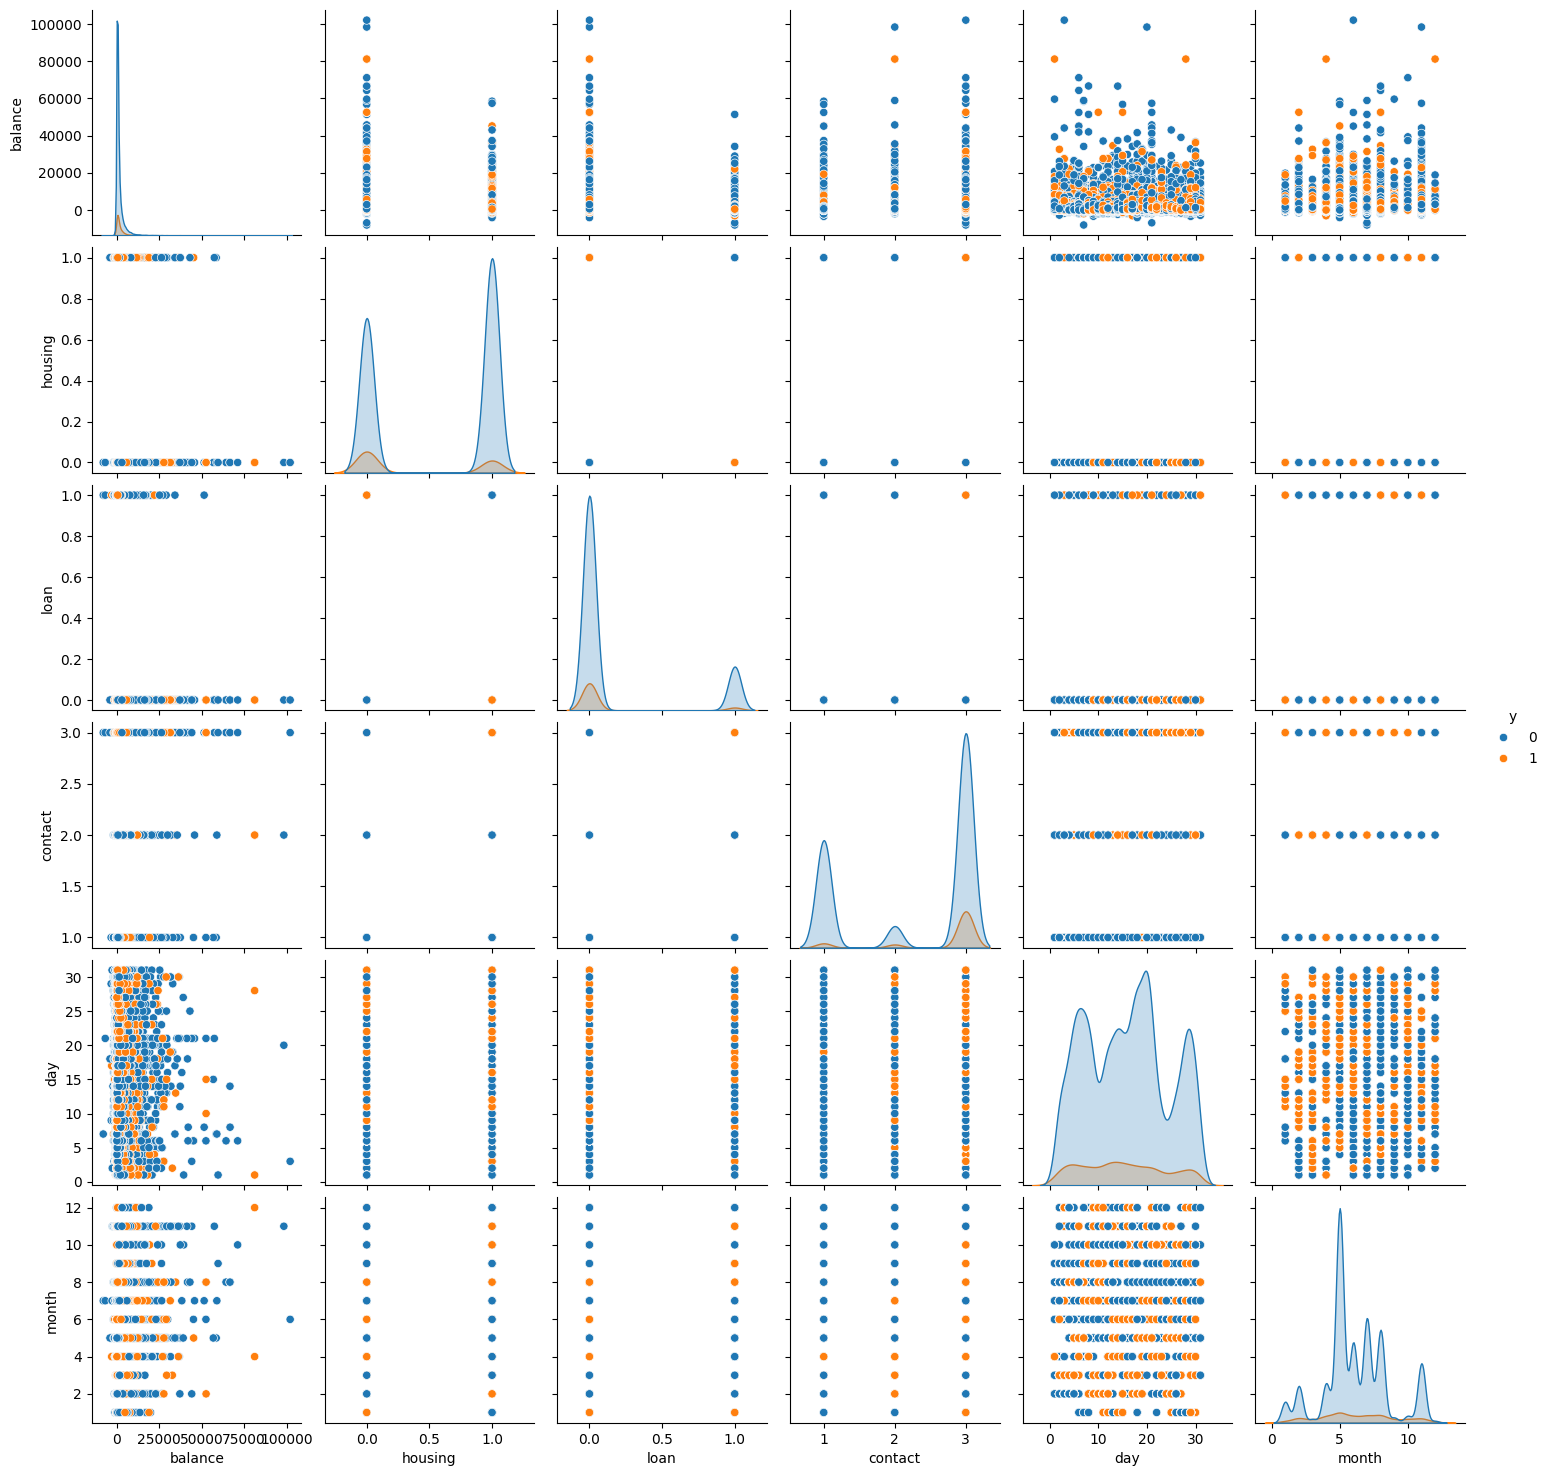

In [16]:
sns.pairplot(dos, hue="y")
plt.show()

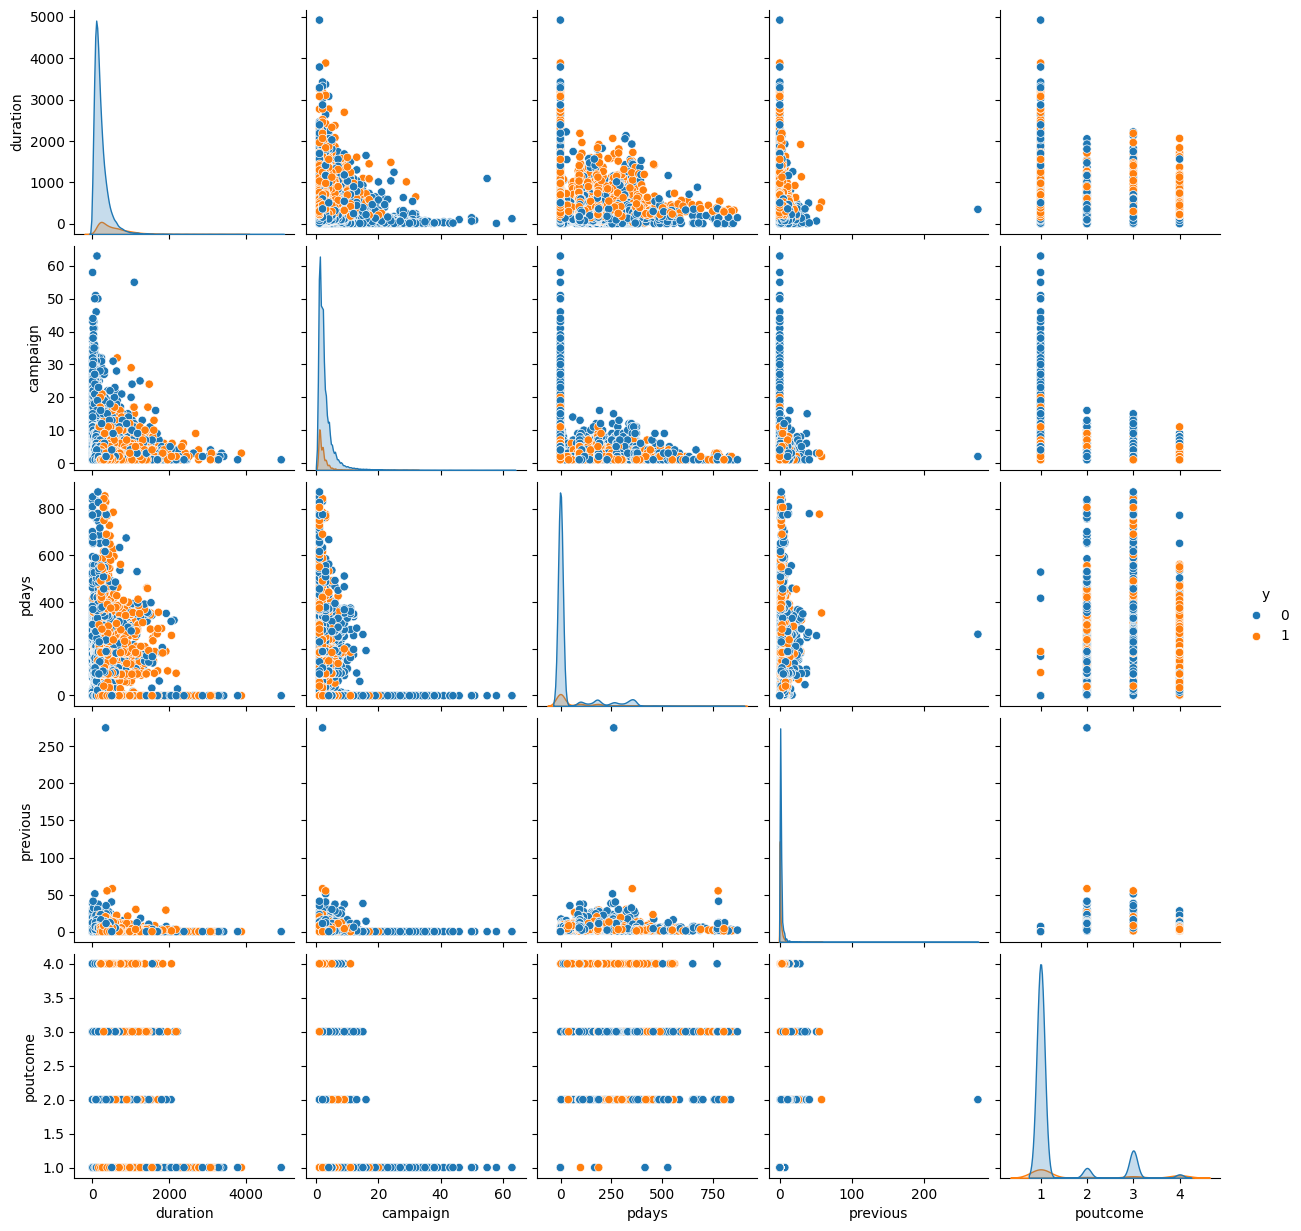

In [17]:
sns.pairplot(tres, hue="y")
plt.show()

### 4 ELECCION DE FEATURES Y DIVISION DEL DATAFRAME

In [18]:
features = ["duration", "poutcome", "contact", "housing", "y"]

datos_seleccionados = BancaMarketing[features]

X = datos_seleccionados.drop("y", axis=1)
y = datos_seleccionados["y"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (36168, 4)
Forma de X_test: (9043, 4)
Forma de y_train: (36168,)
Forma de y_test: (9043,)


### 5. ENTRENAMIENTO DEL MODELO.

In [19]:
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

LogisticRegression()

In [20]:

# Calcular predicciones en el conjunto de entrenamiento y prueba
y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

# Calcular MAE
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calcular RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Train MAE:", mae_train)
print("Test MAE:", mae_test)
print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)



Train MAE: 0.10307454103074541
Test MAE: 0.1070441225257105
Train RMSE: 0.3210522403453142
Test RMSE: 0.3271759809731003


### 6. PESO DE LOS FEATURES.

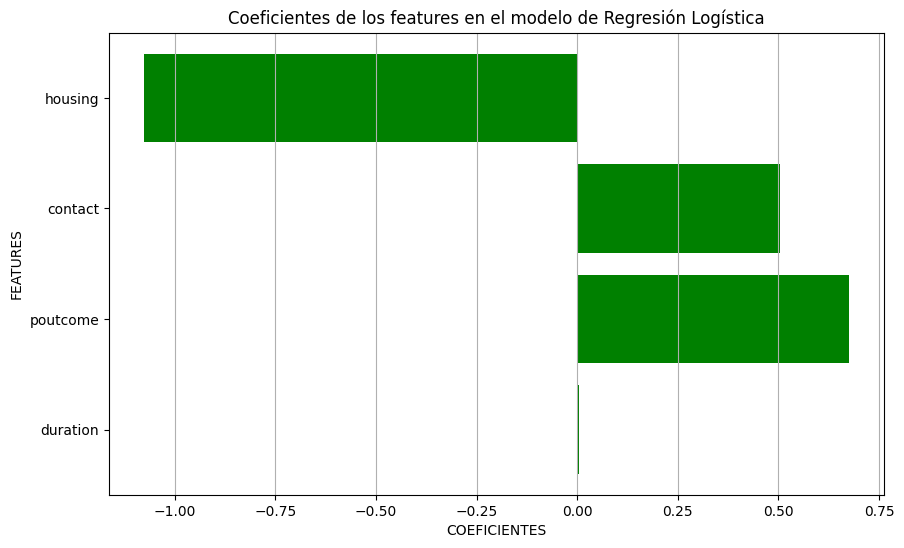

In [21]:


coeficientes = modelo.coef_[0]
nombres_caracteristicas = X.columns

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(nombres_caracteristicas, coeficientes, color='GREEN')
plt.xlabel('COEFICIENTES')
plt.ylabel('FEATURES')
plt.title('Coeficientes de los features en el modelo de Regresión Logística')
plt.grid(axis='x')
plt.show()


### 7. ARBOL DE DECION

In [22]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42) 
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [23]:
y_pred = tree_reg.predict(X)

print("MAE:", mean_absolute_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))


MAE: 0.16097036685290253
RMSE: 0.28369910720065944


In [24]:
tree_reg_bis = DecisionTreeRegressor(max_depth=3, random_state=42) 
tree_reg_bis.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [25]:
y_pred = tree_reg_bis.predict(X)

print("MAE:", mean_absolute_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))

MAE: 0.15429151234279903
RMSE: 0.2777512487305854


In [26]:
tree_cuatro = DecisionTreeRegressor(max_depth=4, random_state=42) 
tree_cuatro.fit(X, y)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [27]:
y_pred_cua = tree_cuatro.predict(X)

print("MAE:", mean_absolute_error(y, y_pred_cua))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred_cua)))

MAE: 0.14945359119328974
RMSE: 0.2733620229597463


In [28]:
tree_cin = DecisionTreeRegressor(max_depth=5, random_state=42) 
tree_cin.fit(X, y)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [29]:
y_pred_cin = tree_cin.predict(X)

print("MAE:", mean_absolute_error(y, y_pred_cin))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred_cin)))

MAE: 0.14587019324303685
RMSE: 0.27006498592286715


In [30]:
tree_sei = DecisionTreeRegressor(max_depth=6, random_state=42) 
tree_sei.fit(X, y)

DecisionTreeRegressor(max_depth=6, random_state=42)

In [31]:
y_pred_sei = tree_sei.predict(X)

print("MAE:", mean_absolute_error(y, y_pred_sei))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred_sei)))

MAE: 0.1434021332885655
RMSE: 0.26777054850054505


In [32]:
from sklearn.model_selection import cross_val_score

level_2 = np.sqrt(-cross_val_score(tree_reg, X, y, cv = 5, scoring= "neg_mean_squared_error"))
level_3 = np.sqrt(-cross_val_score(tree_reg_bis, X, y, cv = 5, scoring = "neg_mean_squared_error"))
level_4 = np.sqrt(-cross_val_score(tree_cuatro, X, y, cv = 5, scoring = "neg_mean_squared_error"))
level_5 = np.sqrt(-cross_val_score(tree_cin, X, y, cv = 5, scoring = "neg_mean_squared_error"))
level_6 = np.sqrt(-cross_val_score(tree_sei, X, y, cv = 5, scoring = "neg_mean_squared_error"))

print("Arbol 2 niveles:", level_2.mean())
print("Arbol 3 niveles:", level_3.mean())
print("Arbol 4 niveles:", level_4.mean())
print("Arbol 5 niveles:", level_5.mean())
print("Arbol 6 niveles:", level_6.mean())

Arbol 2 niveles: 0.2813066786008849
Arbol 3 niveles: 0.2798753626420871
Arbol 4 niveles: 0.2770994355200433
Arbol 5 niveles: 0.2780681654402029
Arbol 6 niveles: 0.27737670994852276


### 8. Visualización del árbol

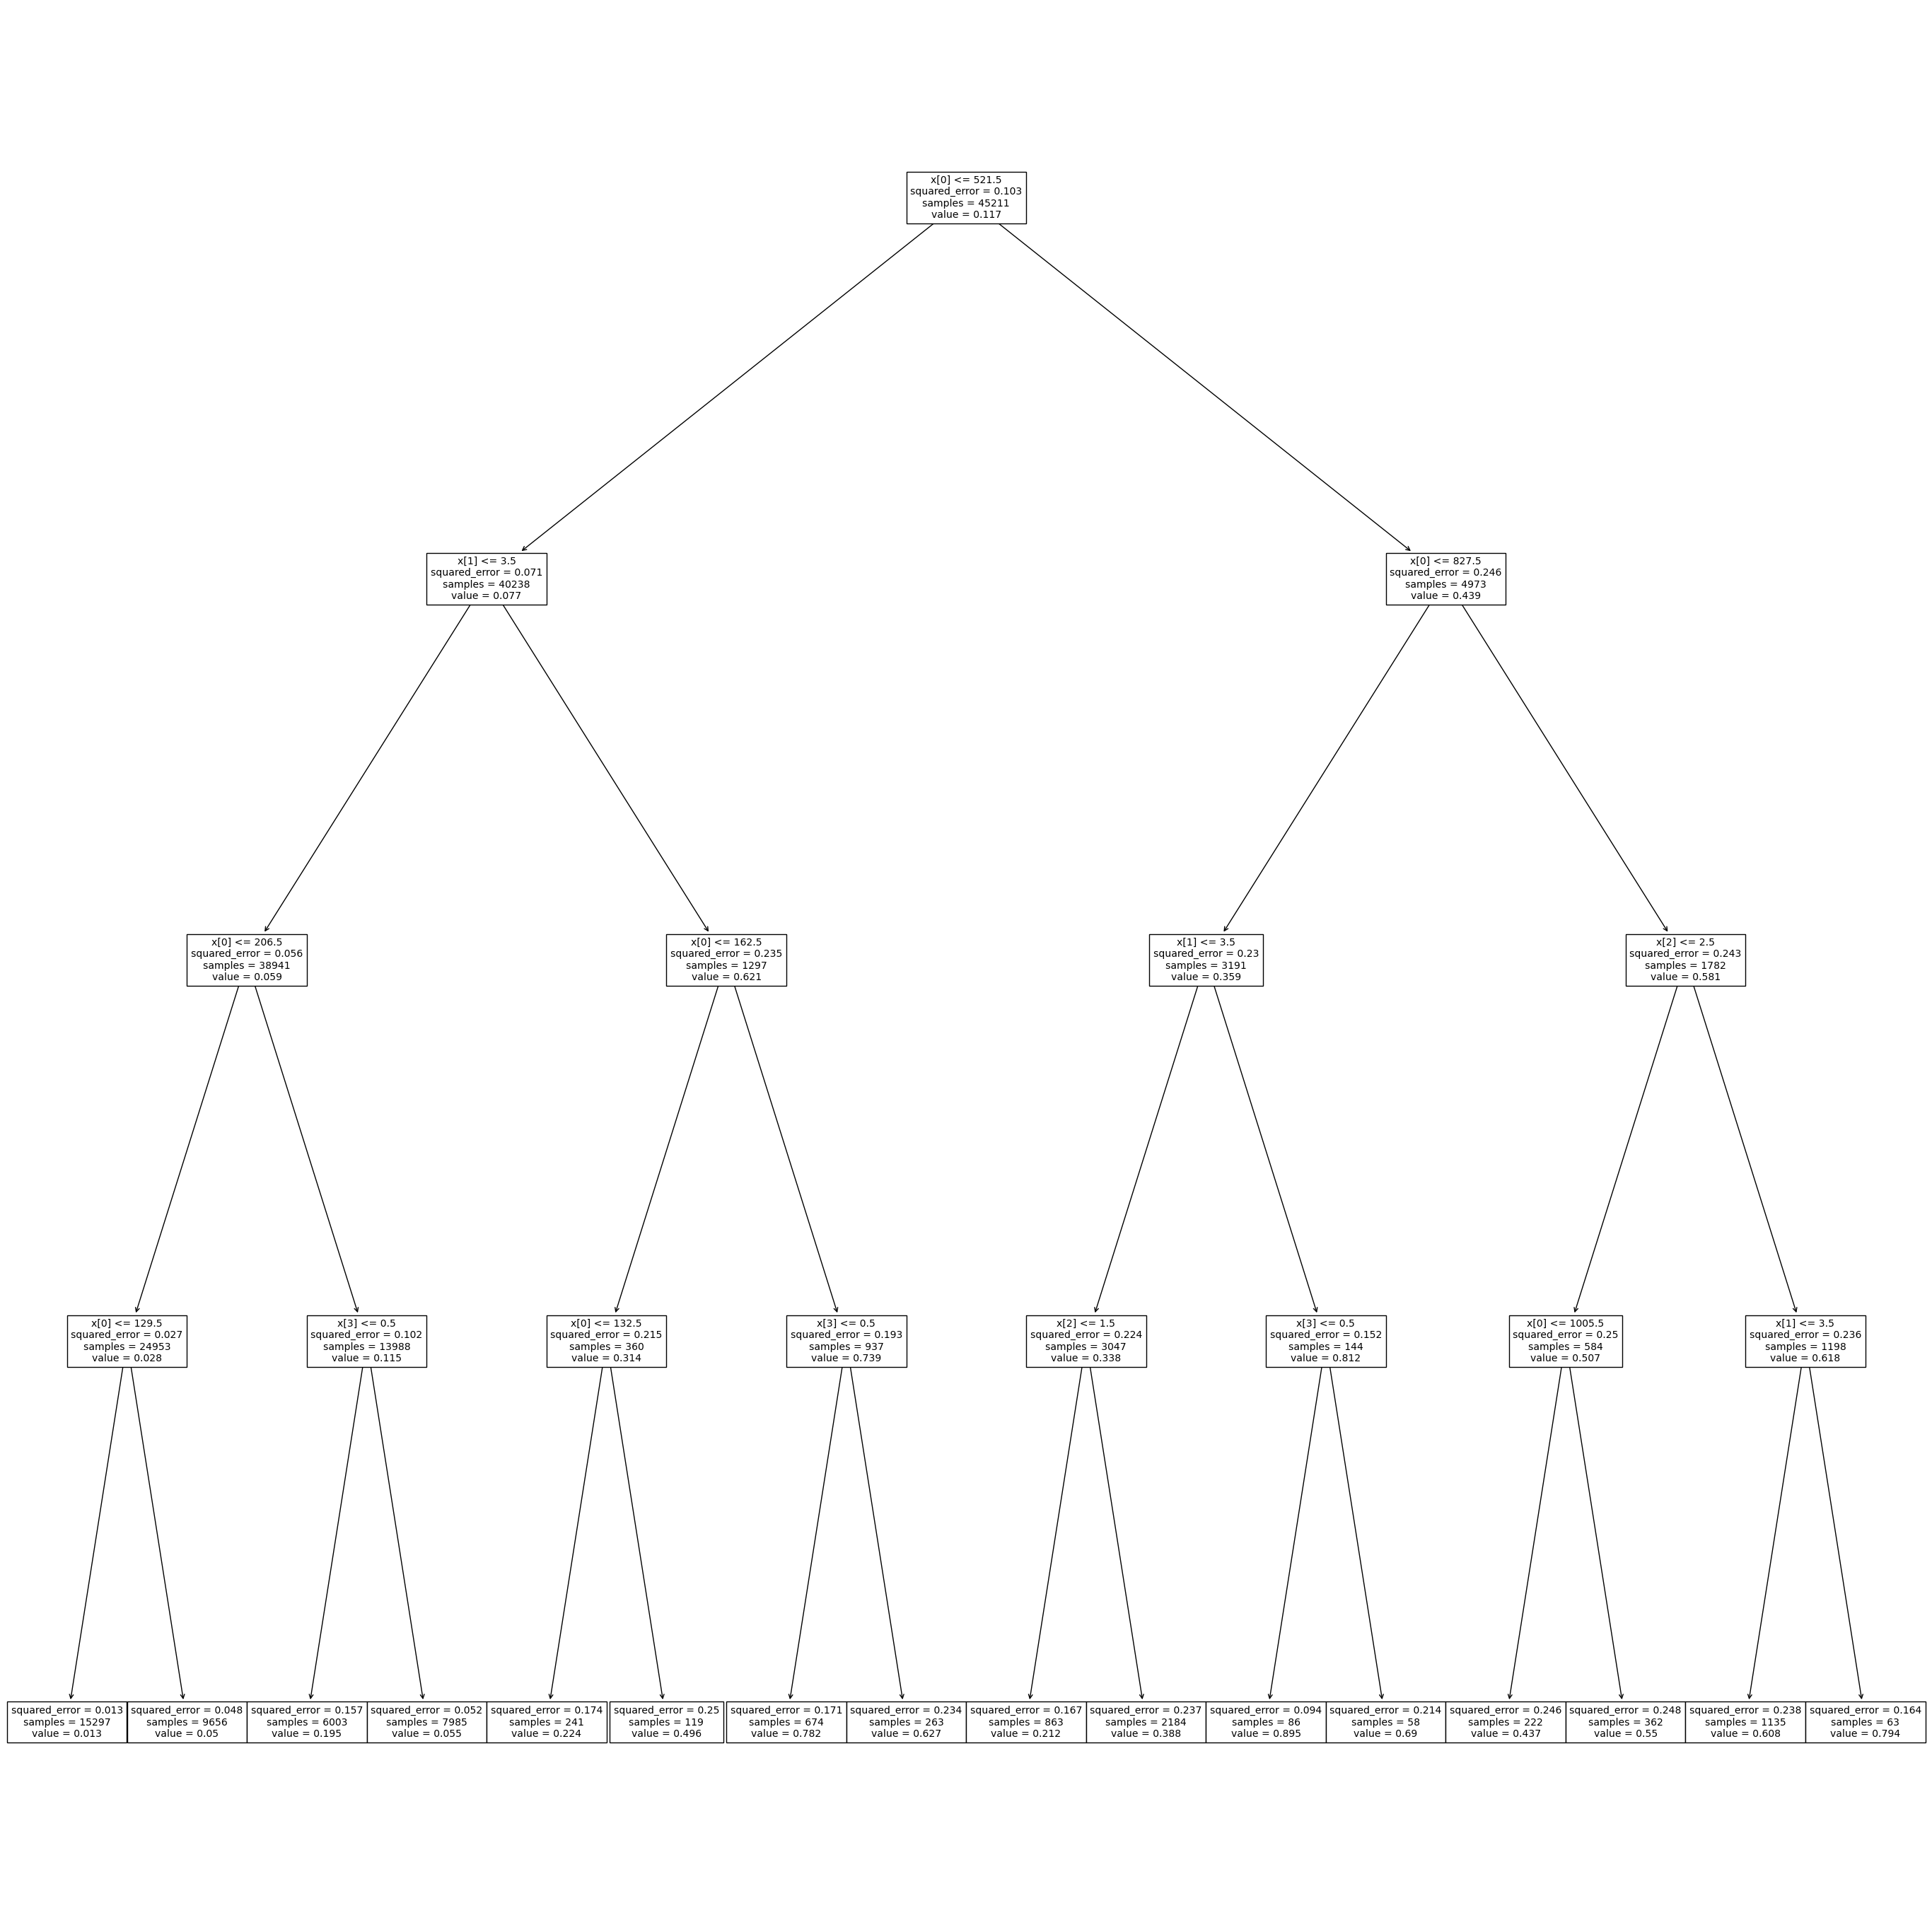

In [35]:

plt.figure(figsize=(35,35))
plot_tree(tree_cuatro);